<a href="https://colab.research.google.com/github/whyeon92/ESAA_YB/blob/Code_Study/ESAA_HW0506.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📌5-1. 회귀 소개

: 연속형 종속변수에 대해 그를 설명할 수 있는 최적의 회귀선 $\hat Y = W_1X_1 + W_2X_2 + \cdots + W_pX_p$을 찾는 것.
(W : 회귀 계수, X : 독립변수)  
  
|독립변수 개수|회귀 계수의 선형 여부|
|----|----|
|1개 -> 단일 회귀|선형 회귀|
|2개 이상 -> 다중 회귀|비선형 회귀|
  
- 일반 선형 회귀  
: 규제 없이 RSS를 최소화하는 회귀선을 찾음
- 릿지 Ridge  
: 선형 회귀 + L2 규제 -> 큰 회귀계수 값을 감소
- 라쏘 Lasso
: 선형 회귀 + L1 규제 -> 아주 작은 회귀 계수를 0으로 만듦
- 엘라스틱넷 ElasticNet  
: L2 + L1 규제
- 로지스틱 회귀  
: 분류에 사용되는 선형 회귀 모델

# 📌5-2. 단순 선형 회귀를 통한 회귀 이해


단순 선형 회귀 : 하나의 독립변수로 종속변수를 예측하는 회귀선  
$RSS(w_0, w_1) = {1 \over N}\sum (\hat y - y)^2$ 라고 둘 때, 해당 값을 최소화하는 w0, w1을 찾아냄

# 📌5-3. 비용 최소화하기 - 경사 하강법(Gradient Descent) 소개


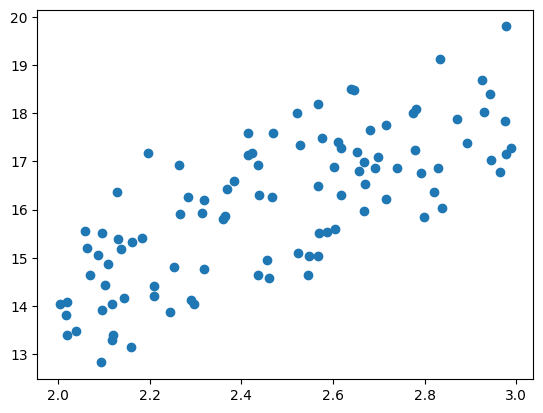

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
#y = 4X + 6을 근사(w1 = 4, w0 = 6). 임의의 값은 노이즈를 위해 만듦
X = 2 + np.random.rand(100, 1)
y = 6 + 4*X + np.random.randn(100, 1)

#X, y 데이터 세트 산점도로 시각화
plt.scatter(X, y)

In [2]:
def get_cost(y, y_pred):
  N = len(y)
  cost = np.sum(np.square(y - y_pred))/N
  return cost
#교재 띄어쓰기 이상해서 임의로 바꿈.

In [3]:
#w1과 w0를 업데이트할 w1_update, w0_update를 반환
def get_weight_updates(w1, w0, X, y, learning_rate = 0.01):
  N = len(y)
  #먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
  w1_update= np.zeros_like(w1)
  w0_update= np.zeros_like(w0)
  #예측 배열 계산하고 예측과 실제 값의 차이 계산
  y_pred = np.dot(X, w1.T) + w0
  diff = y - y_pred

  #w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
  w0_factors = np.ones((N, 1))

  #w1과 w0를 업데이트할 w1_update와 w0_update 계산
  w1_update= -(2/N)*learning_rate*(np.dot(X.T, diff))
  w0_update= -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

  return w1_update, w0_update

In [4]:
#입력인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함
def gradient_descent_steps(X, y, iters = 10000):
  #w0와 w1를 모두 0으로 초기화
  w0 = np.zeros((1, 1))
  w1 = np.zeros((1, 1))

  #인자로 주어진 iters만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행
  for ind in range(iters):
    w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate = 0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update

  return w1, w0

In [5]:
def get_cost(y, y_pred):
  N = len(y)
  cost = np.sum(np.square(y - y_pred))/N
  return cost

w1, w0 = gradient_descent_steps(X, y, iters = 10000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0, 0], w0[0, 0]))
y_pred = w1[0, 0]*X + w0
print('Gradient Descent Total Cost: {0:.4f}'.format(get_cost(y, y_pred)))

w1:4.100 w0:5.941
Gradient Descent Total Cost: 0.9947


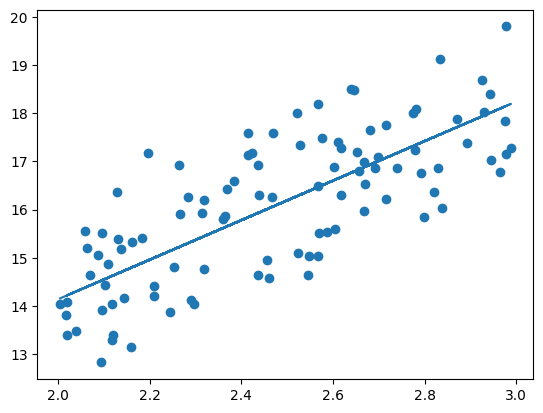

In [6]:
plt.scatter(X, y)
plt.plot(X, y_pred)

In [7]:
def stochastic_gradient_descent_steps(X, y, batch_size = 10, iters = 1000):
  w0 = np.zeros((1, 1))
  w1 = np.zeros((1, 1))
  prev_cost = 100000
  iter_index = 0

  for ind in range(iters):
    np.random.seed(ind)
    #전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X, sample_y로 저장
    stochastic_random_index = np.random.permutation(X.shape[0])
    sample_X = X[stochastic_random_index[0:batch_size]]
    sample_y = y[stochastic_random_index[0:batch_size]]
    #랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
    w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate = 0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update
  return w1, w0

In [8]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters = 1000)
print("w1:", round(w1[0, 0], 3), "w0:", round(w0[0, 0], 3))
y_pred = w1[0, 0]*X + w0
print('Stochastic Gradient Descent Total Cost: {0:.4f}'.format(get_cost(y, y_pred)))

w1: 5.243 w0: 3.082
Stochastic Gradient Descent Total Cost: 1.1356


**[경사하강법]**  
: 그냥 간단하게 최적의 W를 찾는 방법 중 하나  
-> loss function = RSS를 그래프로 그릴 때, 해당 함수의 기울기를 통해 그래프의 가장 낮은 지점을 찾음,  
기울기 > 0 -> 음의 방향으로 이동, 기울기 < 0 -> 양의 방향으로 이동

# 📌5-4. 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
%matplotlib inline

#보스턴 데이터 가져오기!
data_url = "http://lib.stat.cmu.edu/datasets/boston"

raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

boston = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :3]])

# feature name이 없으므로 따로 지정해줘야 함.

feature_names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX' ,'PTRATIO', 'B' ,'LSTAT', 'PRICE']

bostonDF = pd.DataFrame(boston, columns=feature_names)

print('Boston 데이터 세트 크기:', bostonDF.shape)

bostonDF.head()

Boston 데이터 세트 크기: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


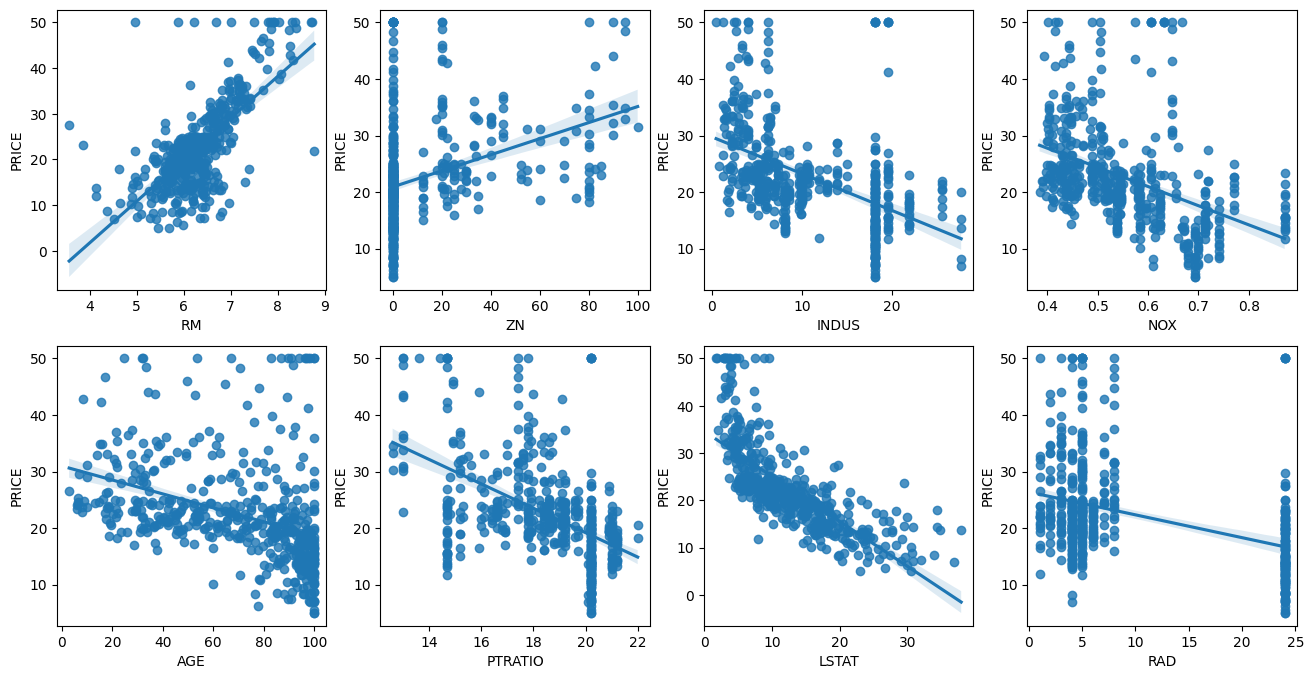

In [13]:
#2개의 행과 4개의 열을 가진 subplots를 이용, axs는 4*2의 ax를 가짐
fig, axs = plt.subplots(figsize = (16, 8), ncols = 4, nrows = 2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
  row = int(i/4)  #몫으로 쓰면 안되남...?
  col = i%4
  #시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
  sns.regplot(x = feature, y = 'PRICE', data = bostonDF, ax = axs[row][col])

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis = 1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.3, random_state = 156)

#선형 회귀 OLS로 학습/예측/평가 수행
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE: {0:.3f}, RMSE: {1:.3f}'.format(mse, rmse))
print('Variance score: {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE: 17.297, RMSE: 4.159
Variance score: 0.757


In [15]:
print('절편 값:', lr.intercept_)
print('회귀 계수 값:', np.round(lr.coef_, 1))

절편 값: 40.995595172164826
회귀 계수 값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [17]:
#회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성, 인덱스 칼럼명에 유의
coeff = pd.Series(data = np.round(lr.coef_, 1), index = X_data.columns)
coeff.sort_values(ascending = False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [18]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis = 1, inplace = False)
lr = LinearRegression()

#cross_val_score()로 5 폴드 세트로 MSE를 구한 뒤이를 기반으로 다시 RMSE 구함
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring = 'neg_mean_squared_error', cv = 5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

#cross_val_Score(scoring = 'neg_mean_squared_error')로 반환된 값은 모두 음수
print('5 folds의 개별 Negative MSE scores:', np.round(neg_mse_scores, 2))
print('5 folds의 개별 RMSE scores:', np.round(rmse_scores, 2))
print('5 folds의 평균 RMSE: {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores: [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE: 5.829


# 📌5-5. 다항 회귀와 과(대)적합/과소적합 이해


In [19]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

#다항식으로 변환한 단항식 생성, [[0, 1]. [2, 3]]의 2X2 행렬 생성
X = np.arange(4).reshape(2, 2)
print('일차 단항식 계수 피처: \n', X)

#degree = 2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly = PolynomialFeatures(degree = 2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처: \n', poly_ftr)

일차 단항식 계수 피처: 
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처: 
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [20]:
def polynomial_func(X):
  y = 1 + 2*X[:, 0] + 3*X[:, 0]**2 + 4*X[:, 1]**3
  return y

X = np.arange(4).reshape(2, 2)
print('일차 단항식 계수: \n', X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수: 
 [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [  5 125]


In [22]:
#3차 다항식 변환
poly_ftr = PolynomialFeatures(degree = 3).fit_transform(X)
print('3차 단항식 계수 Feature: \n', poly_ftr)

#Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수 \n', np.round(model.coef_, 2))
print('Polynomial 회귀 Shape: ', model.coef_.shape)

3차 단항식 계수 Feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수 
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape:  (10,)


In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
  y = 1 + 2*X[:, 0] + 3*X[:, 0]**2 + 4*X[:, 1]**3
  return y

#Pipeline 객체로 Streamline하게 Polynomial Feature 변환과 LinearRegression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree = 3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2, 2)
y = polynomial_func(X)

model.fit(X, y)

print('Polynomial 회귀 계수 \n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수 
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


## 다항 회귀를 이용한 과소적합 및 과적합 이해

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

#임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환
def true_fun(X):
  return np.cos(1.5 * np.pi * X)

#X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터입니다
np.random.seed(0)
n_samples= 30
X = np.sort(np.random.rand(n_samples))

#y 값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값입니다.
y = true_fun(X) + np.random.randn(n_samples) * 0.1


Degree 1, 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE는 0.4077289625098685입니다.

Degree 4, 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE는 0.04320874987232064입니다.

Degree 15, 회귀 계수는 [-2.98293000e+03  1.03899390e+05 -1.87416123e+06  2.03716219e+07
 -1.44873283e+08  7.09315363e+08 -2.47065792e+09  6.24561050e+09
 -1.15676510e+10  1.56894936e+10 -1.54006023e+10  1.06457264e+10
 -4.91377530e+09  1.35919645e+09 -1.70380786e+08] 입니다.
Degree 15 MSE는 181238256.56423894입니다.


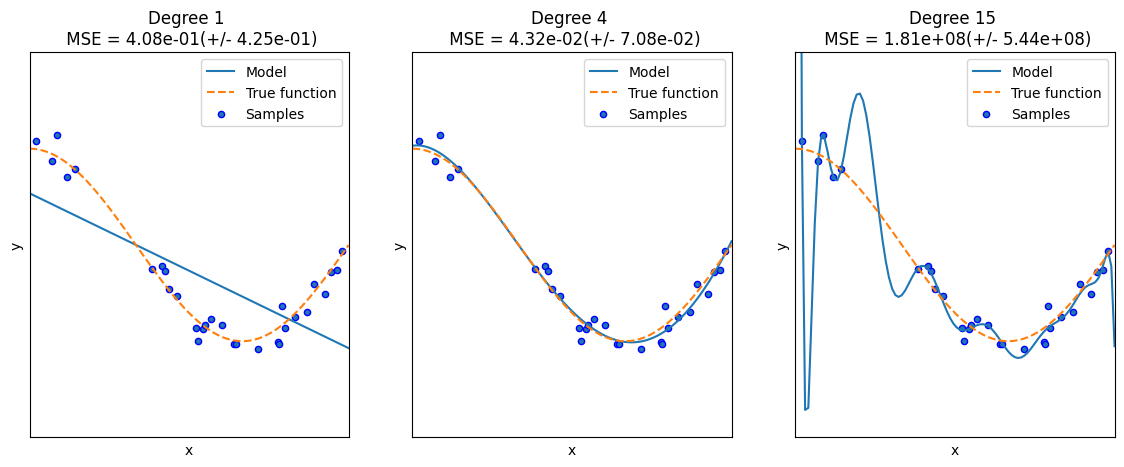

In [28]:
plt.figure(figsize = (14, 5))
degrees = [1, 4, 15]

#다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다.
for i in range(len(degrees)):
  ax = plt.subplot(1, len(degrees), i + 1)
  plt.setp(ax, xticks = (), yticks = ())

  #개별 degree별로 Polynomial 변환합니다.
  polynomial_features = PolynomialFeatures(degree = degrees[i], include_bias = False)
  linear_regression = LinearRegression()
  pipeline = Pipeline([('polynomial_features', polynomial_features),
                       ('linear_regression', linear_regression)])
  pipeline.fit(X.reshape(-1, 1), y)

  #교차 검증으로 다항 회귀를 평가합니다.
  scores = cross_val_score(pipeline, X.reshape(-1, 1), y, scoring = 'neg_mean_squared_error', cv = 10)
  #Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
  coefficients = pipeline.named_steps['linear_regression'].coef_
  print('\nDegree {0}, 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients, 2)))
  print('Degree {0} MSE는 {1}입니다.'.format(degrees[i], -1*np.mean(scores)))

  #0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다.
  #테스트 데이터 세트에 회귀예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.
  X_test = np.linspace(0, 1, 100)
  #예측값 곡선
  plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label = 'Model')
  #실제값 곡선
  plt.plot(X_test, true_fun(X_test), '--', label = 'True function')
  plt.scatter(X, y, edgecolor = 'b', s = 20, label = 'Samples')

  plt.xlabel('x');plt.ylabel('y');plt.xlim((0, 1));plt.ylim((-2, 2));plt.legend(loc = 'best')
  plt.title("Degree {} \n MSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()

**[다항 회귀]**  
앞선 선형 회귀는 각 독립변수의 차수(degree)가 1인 회귀, 다항 회귀는 그 차수를 2 이상으로 만든 회귀  
-> 만약 독립변수와 종속변수간의 관계가 선형이 아니라면 오히려 다항 회귀가 더 잘맞을 수 있음  
-> ⚠️다항 회귀 != 비선형 회귀, 선형 회귀인지 아닌지 구분하는 것은 회귀 계수의 선형 여부이지 독립변수가 선형인지의 여부가 아니기 때문  
  
**[다항 회귀를 이용한 과적합 이해]**  
- 실제 값을 고려하지 않고 무작정 선형회귀로 예측 시 과소적합 가능  
- 그러나 데이터 세트의 변동 값을 지나치게 반영하면 학습 데이터에만 과하게 적합되어 학습 데이터 외에 새로운 데이터에 대해 예측하게 될 때엔 오히려 예측 성능이 떨어질 수 있음 -> 과적합!  
  
**[편향-분산 트레이드오프]**  
: 편향이 낮아지면 분산은 높아진다!
최적의 모델: 저분산, 저편향   
-> 분산과 편향을 적절하게 조절해서 전체 오류가 가장 낮아지는 지점을 찾아 예측 성능을 높임.